# Week 5 Lab: Supervised Learning

# Introduction

This week's assignment will focus on completeing a KNN analysis and comparing its performance with other supervised algorithms.

## Our Dataset: 
**Dataset:** bank-additional-full.csv (Provided in folder assign_wk5)


[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

Input variables:
#### bank client data:
   - **age** (numeric)
   - **job:** type of job 
       (categorical) "admin." "blue-collar" "entrepreneur" "housemaid" "management" "retired" "self-employed" "services" "student" "technician" "unemployed" **"unknown"**
   - **marital:** marital status 
       (categorical) "divorced" "married" "single" **"unknown"**
       **note:** "divorced" means divorced or widowed      
   - **education** 
       (categorical) "basic.4y" "basic.6y" "basic.9y" "high.school" "illiterate" "professional.course" "university.degree" **"unknown"**
   - **default:** has credit in default? 
       (categorical) "no" "yes" **"unknown"**
   - **housing:** has housing loan? 
       (categorical) "no" "yes" **"unknown"**
   - **loan:** has personal loan? 
       (categorical) "no" "yes" **"unknown"**
       
#### Related with the Last Contact of the Current Campaign:
  
   - **contact:** contact communication type 
       (categorical) "cellular" "telephone"
       
   - **month:** last contact month of year 
       (categorical) "jan" "feb" "mar" "etc"
       
   - **day_of_week:** last contact day of the week 
      (categorical) "mon" "tue" "wed" "thu" "fri"
      
   - **duration:** last contact duration, in seconds (numeric) 
      **Important note:**  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, *__this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.__*
      
#### Other Attributes:
   
   - **campaign:** number of contacts performed during this campaign and for this client (numeric) includes last contact
   - **pdays:** number of days that passed by after the client was last contacted from a previous campaign 
      (numeric) 999 means client was not previously contacted
   - **previous:** number of contacts performed before this campaign and for this client 
      (numeric)
      
   - **poutcome:** outcome of the previous marketing campaign 
      (categorical) "failure" "nonexistent" "success"
      
#### Social and Economic Context Attributes:
   
   - **emp.var.rate:** employment variation rate - quarterly indicator 
      (numeric)
      
   - **cons.price.idx:** consumer price index - monthly indicator 
      (numeric)     
      
   - **cons.conf.idx:** consumer confidence index - monthly indicator 
      (numeric)   
      
   - **euribor3m:** euribor 3 month rate - daily indicator 
      (numeric)
      
   - **nr.employed:** number of employees - quarterly indicator 
      (numeric)

  #### Output variable (desired target):
  
   - **y:** has the client subscribed a term deposit? 
      (binary) "yes" "no"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv("assign_wk5/bank-additional-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Assignment Requirements

## Part 1: KNN Analysis
**Objective:** According to the dataset's text file, the target column the last column in the dataset.

### Cleanup the dataset as you see deem appropriate. As always, defend your reasoning!!!
       - Missing values?

According to the supporting text file:

There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [3]:
df.replace('unknown', np.nan, inplace=True)

### First step: Missing Values (Quick removal)

I found a tutorial on the following technique: https://www.youtube.com/watch?v=DNgCfWJIW5A

I first removed any missing values that totaled less than 1% of the entire feature.

In [4]:
features_completecase = [ feature for feature in df.columns if df[feature].isnull().mean() < 0.01 ]

In [5]:
df.shape

(41188, 21)

In [6]:
df[features_completecase].shape

(41188, 17)

In [7]:
df_clean = df.to_csv('assign_wk5/df_clean.csv', index=False)
df_clean = pd.read_csv('assign_wk5/df_clean.csv')
df_clean.dropna(axis=0, subset={'job', 'marital'}, inplace=True)

In [8]:
len(df_clean)/len(df)

0.9902641546081383

I still have 99% of the original dataframe!

### Second step: Missing Values (conditional inputation)

In [9]:
df_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
missing_var = [var for var in df.columns if df_clean[var].isnull().mean()>0 
               and df_clean[var].dtypes == 'O']

In [11]:
missing_var

['education', 'default', 'housing', 'loan']

In [12]:
df_clean[missing_var].isnull().mean()

education    0.039130
default      0.206831
housing      0.024125
loan         0.024125
dtype: float64

In [13]:
df_clean.fillna('Missing', inplace = True)

In [14]:
df_clean['default'].value_counts()

no         32348
Missing     8436
yes            3
Name: default, dtype: int64

In [15]:
df[(df['default'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


I'm thinking that those that are in default and unemployed will not answer. I probably wouldn't 

**debt is scary**

In [16]:
nan_default = df_clean.loc[(df_clean['default'] == 'Missing') 
             & (df_clean['job'] == 'unemployed')]

In [17]:
nan_default['default'].replace({'Missing':'yes'}, inplace=True)

In [18]:
df_clean.update(nan_default)

In [19]:
df_clean.default.value_counts()

no         32348
Missing     8199
yes          240
Name: default, dtype: int64

In [20]:
df_clean['education'].value_counts().sort_values()

illiterate                18
Missing                 1596
basic.6y                2264
basic.4y                4118
professional.course     5225
basic.9y                6006
high.school             9464
university.degree      12096
Name: education, dtype: int64

In [21]:
nan_education = df_clean.loc[(df_clean['education'] == 'Missing') 
             & (df_clean['job'] == 'student')
             & (df_clean['age'] > 18)]

In [22]:
nan_education

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
383,30.0,student,single,Missing,Missing,no,no,telephone,may,tue,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3011,30.0,student,single,Missing,Missing,no,no,telephone,may,wed,...,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
3442,31.0,student,single,Missing,Missing,yes,no,telephone,may,thu,...,5.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
3620,26.0,student,single,Missing,Missing,no,no,telephone,may,fri,...,5.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
5808,30.0,student,single,Missing,Missing,yes,no,telephone,may,mon,...,2.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40923,20.0,student,single,Missing,no,no,no,cellular,oct,mon,...,3.0,999.0,3.0,failure,-1.1,94.601,-49.5,0.977,4963.6,no
40929,20.0,student,single,Missing,no,yes,yes,cellular,oct,tue,...,1.0,3.0,4.0,success,-1.1,94.601,-49.5,0.982,4963.6,yes
40935,20.0,student,single,Missing,no,no,no,telephone,oct,tue,...,1.0,999.0,1.0,failure,-1.1,94.601,-49.5,0.982,4963.6,no
41002,45.0,student,single,Missing,no,yes,no,cellular,oct,wed,...,2.0,999.0,2.0,failure,-1.1,94.601,-49.5,1.016,4963.6,no


I will assume all students have completed highschool and are working on post-secondary education or professional courses. 

**In this world GEDs don't exist**

Also, let's stick to adults, I will assume missing educations for students age 18 have completed high school.

In [23]:
df_clean.drop(df_clean[df_clean['age'] == 17].index, inplace=True)

In [24]:
nan_education['education'].replace({'Missing':'high.school'}, inplace=True)

In [25]:
df_clean.update(nan_education)

In [26]:
df_clean.education.value_counts()

university.degree      12096
high.school             9616
basic.9y                6003
professional.course     5225
basic.4y                4118
basic.6y                2264
Missing                 1442
illiterate                18
Name: education, dtype: int64

In [27]:
hs_student = df_clean[(df_clean['age'] == 18)&
         (df_clean['education'] == 'Missing')]

In [28]:
hs_student['education'].replace({'Missing':'high.school'}, inplace=True)

In [29]:
df_clean.update(hs_student)

In [30]:
df_clean.education.value_counts()

university.degree      12096
high.school             9629
basic.9y                6003
professional.course     5225
basic.4y                4118
basic.6y                2264
Missing                 1429
illiterate                18
Name: education, dtype: int64

If there are no values across the loan questions the data is not valuable for drawing conclusions or ML training. I don't want my algorithm to learn what not-to-do as much as possible.

**boring data**

In [31]:
df_clean['loan'].value_counts().sort_values()

Missing      983
yes         6182
no         33617
Name: loan, dtype: int64

In [32]:
df_clean.drop( df_clean [ (df_clean['housing'] == 'Missing') &
                         (df_clean['loan'] == 'Missing') &
                         (df_clean['default'] == 'Missing')].index, inplace=True )

Let's see how I did:

In [33]:
df_clean.replace('Missing', np.nan, inplace=True)

In [34]:
df_clean[missing_var].isnull().mean()

education    0.034831
default      0.196810
housing      0.018932
loan         0.018932
dtype: float64

In [35]:
len(df_clean)/len(df)

0.9849227930465184

**I still have 98% of the original data!**

### Cleanup the dataset as you see deem appropriate. As always, defend your reasoning!!!
    - Column names

In [36]:
df_clean.fillna('Missing', inplace = True)

In [37]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [38]:
df_clean.rename(columns={'campaign':'campaign_num', 'pdays': 'days_since_last_call', 'previous':'num_times_called', 'poutcome':'outcome_last_campaign', 'emp.var.rate':'quarterly_hiring_ratio', 'cons.price.idx':'cpi_base100', 'euribor3m': 'int_rate_to_central_bank', 'nr.employed':'num_employees_qrtly', 'y':'subscribed_term_deposit' }, inplace=True)
df_clean.to_csv('assign_wk5\df_clean.csv', index=False)

In [39]:
df_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign_num,days_since_last_call,num_times_called,outcome_last_campaign,quarterly_hiring_ratio,cpi_base100,cons.conf.idx,int_rate_to_central_bank,num_employees_qrtly,subscribed_term_deposit
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,Missing,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### - Prepare the data for machine learning
       - A little EDA goeas a long way

In [40]:
df_corr = df_clean.corr()

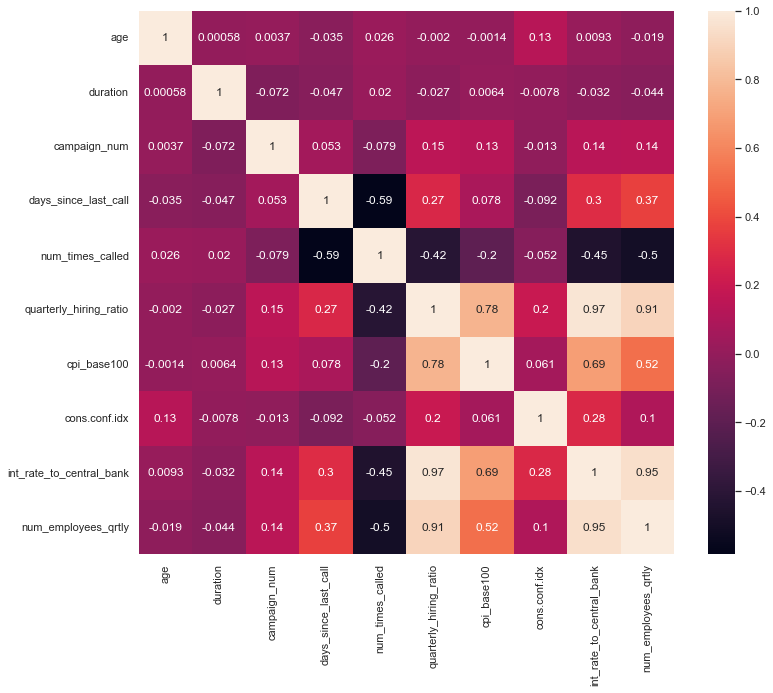

In [41]:
f, ax = plt.subplots(figsize=(12,10))
_ = sns.heatmap(df_corr, annot=True)

I am seeing a positive correlation between the quarterly_hiring_ratio (based on the ratio of hiring vs firing from last quarter to the current quarter) and the interest rates to the central bank (97% corr). Also the correlation between number of employees of the quarter and the interest rates (95%). 


(The original euribor3m is a base for the XYZ Bonds interest rate.) [source](https://www.educba.com/euribor/)

num_times_called isn't really doing much for the data

df_clean.drop(['num_times_called'],axis=1, inplace=True)

### - Prepare the data for machine learning
       - Do you need to do anything about data types?

In [42]:
df_clean.dtypes

age                         float64
job                          object
marital                      object
education                    object
default                      object
housing                      object
loan                         object
contact                      object
month                        object
day_of_week                  object
duration                    float64
campaign_num                float64
days_since_last_call        float64
num_times_called            float64
outcome_last_campaign        object
quarterly_hiring_ratio      float64
cpi_base100                 float64
cons.conf.idx               float64
int_rate_to_central_bank    float64
num_employees_qrtly         float64
subscribed_term_deposit      object
dtype: object

In [43]:
df_clean.to_csv('assign_wk5\df_clean_nominal.csv', index=False)

df_p2 = df_clean
df_nom = pd.read_csv('assign_wk5\df_clean_nominal.csv')

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_nom['month'] = le.fit_transform(df_nom['month'])
df_nom['day_of_week'] = le.fit_transform(df_nom['day_of_week'])
df_nom['subscribed_term_deposit'] = le.fit_transform(df_nom['subscribed_term_deposit'])
df_nom['marital'] = le.fit_transform(df_nom['marital'])
df_nom['default'] = le.fit_transform(df_nom['default'])
df_nom['housing'] = le.fit_transform(df_nom['housing'])
df_nom['loan'] = le.fit_transform(df_nom['loan'])
df_nom['contact'] = le.fit_transform(df_nom['contact'])
df_nom['job'] = le.fit_transform(df_nom['job'])
df_nom['education'] = le.fit_transform(df_nom['education'])
df_nom['outcome_last_campaign'] = le.fit_transform(df_nom['outcome_last_campaign'])

In [45]:
nom_corr = df_nom.corr()

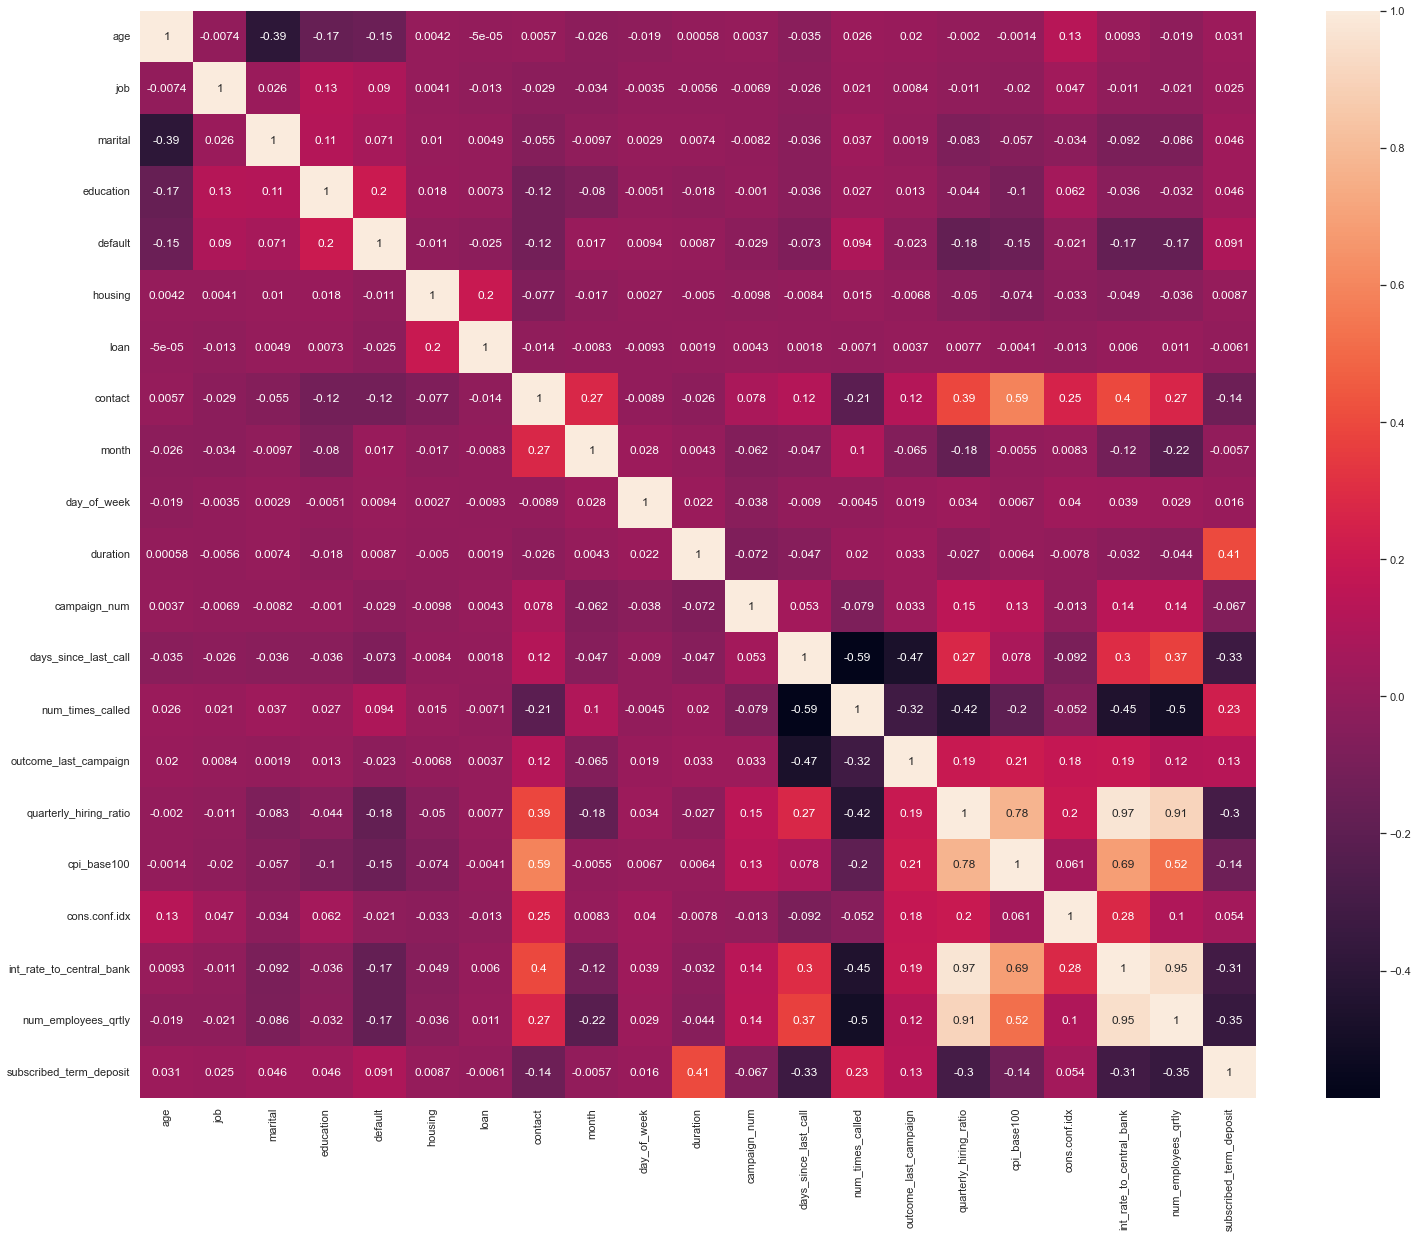

In [46]:
f, ax = plt.subplots(figsize=(25,20))
_ = sns.heatmap(nom_corr, annot=True)

###  - KNN analysis
       - What is your objective from the analysis?

I would like to predict the euribor3m.

In [47]:
df_nom.shape

(40567, 21)

In [48]:
cols = df_nom.columns
target_col = 'subscribed_term_deposit'
feat_cols = [c for c in cols if c != target_col]

array = df_nom.values

X = array[:, 1:5]
y = array[:, 0]

In [49]:
y

array([56., 57., 37., ..., 56., 44., 74.])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = KNeighborsRegressor(n_neighbors=9, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [52]:
preds = model.predict(X_test)
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[44. 43. 34. ... 43. 32. 28.]
Predictions for test data set
[46.44444444 45.44444444 46.         ... 39.55555556 38.44444444
 37.33333333]


In [53]:
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[ -2.44444444  -2.44444444 -12.         ...   3.44444444  -6.44444444
  -9.33333333]


In [54]:
from sklearn.metrics import r2_score

print(r2_score(y_test,preds))

0.3554671474824106


In [55]:
from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test,preds))

0.35554899418606734


I was not a fan of the R^2 and variance scores of the df_nom with variables removed. This is better but still not best, let's fix the random cluster and see how we can improve our scores.

###  - KNN analysis
       - What is your optimal K? 

In [56]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')


for k in range(2, 20):
    print(f'Evaluating {k} clusters')
    
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign_num', 'days_since_last_call', 'num_times_called', 'outcome_last_campaign', 'quarterly_hiring_ratio', 'cpi_base100', 'cons.conf.idx', 'int_rate_to_central_bank', 'num_employees_qrtly'] 
Target: subscribed_term_deposit
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


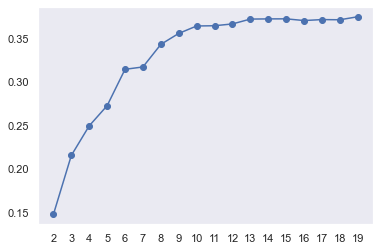

In [57]:
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

In [58]:
model = KNeighborsRegressor(n_neighbors=9, n_jobs=-1)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[44. 43. 34. ... 43. 32. 28.]
Predictions for test data set
[46.44444444 45.44444444 46.         ... 39.55555556 38.44444444
 37.33333333]


In [59]:
differs = y_test - preds

print(f'r2_score: {r2_score(y_test,preds)}')

Differences between the two sets:
[ -2.44444444  -2.44444444 -12.         ...   3.44444444  -6.44444444
  -9.33333333]

r2_score: 0.3554671474824106


K-9 was the greatest number of clusters for R^2 score and K-19 for variance score optimization, r^2 is only 35% which is not great.

###  - KNN analysis 
       - How about accuracy rate? 

In [60]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 12.005457431272214
RMSE value for k=  2 is: 9.608127824187475
RMSE value for k=  3 is: 9.218810691847674
RMSE value for k=  4 is: 9.01683484577254
RMSE value for k=  5 is: 8.876974449433405
RMSE value for k=  6 is: 8.618518608652876
RMSE value for k=  7 is: 8.601450995555732
RMSE value for k=  8 is: 8.436673712724499
RMSE value for k=  9 is: 8.355650923259631
RMSE value for k=  10 is: 8.300138536727186
RMSE value for k=  11 is: 8.298315326027128
RMSE value for k=  12 is: 8.284747651901311
RMSE value for k=  13 is: 8.248231299785301
RMSE value for k=  14 is: 8.246949724281114
RMSE value for k=  15 is: 8.246481561138506
RMSE value for k=  16 is: 8.259367452743312
RMSE value for k=  17 is: 8.252059307760344
RMSE value for k=  18 is: 8.253441635718106
RMSE value for k=  19 is: 8.23065578163596
RMSE value for k=  20 is: 8.208410475024833


<AxesSubplot:>

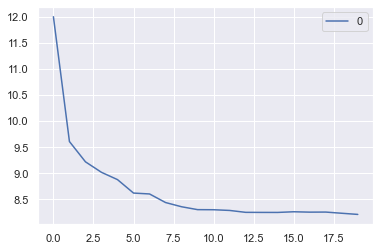

In [62]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [63]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

For greatest accuracy a K-9 is best. [source](https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/)

###  - Discover any insights from this analysis? 
       [x] Include numbers/graphs corresponding to your conclusions
       [x] Discuss ways to improve the performance of your KNN model 
       [x] Defend and backup your thoughts!!!!!!

In this KNN Regression analysis it appears that the greater the number of clusters the greater the accuracy but that caps at around 35% and to maximize the accuracy the clusters needs to be around 9. Even still the accuracy is poor and so is our R^2 which is supposed to determine the strength of the relationships between variables. It is almost like there is no relationship between these variables. Maybe the need to be altered in another way? If I lower the number of variables or do a classification KNN with the object dtypes maybe there would be greater accuracy for the 'y' outcome? I can try that for Part 2.

## Part 2: Comparison to other supervised algorithm

###  At the end of part 1 you discussed ways to improve the performance of you KNN model. 
   - Implement one of those methods to improve your KNN model performance.
   - Rerun a KNN analysis for your improved dataset
   - Discuss the change in performance from the model in part 1

#### Classification KNN

```from sklearn.neighbors import KNeighborsClassifier```

```array = df_nom.values```

```
X = array[:,1:]
y = array[:,0]
```

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

```
scores = []
for k in range(2, 20):
    print(f'Evaluating {k} clusters')
    
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
```

```
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)

plt.xticks(range(2, 20))

print(f'\nMax accuracy = {(max(scores)*100)}%')
```

```
max(scores)
```

it was 4% accurate

I give up. The machine hates the data.

#### Lower Variables?

In [64]:
df_nom.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign_num',
       'days_since_last_call', 'num_times_called', 'outcome_last_campaign',
       'quarterly_hiring_ratio', 'cpi_base100', 'cons.conf.idx',
       'int_rate_to_central_bank', 'num_employees_qrtly',
       'subscribed_term_deposit'],
      dtype='object')

In [65]:
df_nom.drop(columns={'marital', 'housing', 'loan', 'month', 'day_of_week'}, inplace=True)

In [66]:
df_nom.shape

(40567, 16)

In [67]:
cols = df_nom.columns
target_col = 'subscribed_term_deposit'
feat_cols = [c for c in cols if c != target_col]

array = df_nom.values

X = array[:, 1:5]
y = array[:, 0]

In [68]:
y

array([56., 57., 37., ..., 56., 44., 74.])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=3)

In [71]:
preds = model.predict(X_test)
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[44. 43. 34. ... 43. 32. 28.]
Predictions for test data set
[52.33333333 45.33333333 38.66666667 ... 42.66666667 40.66666667
 31.66666667]


In [72]:
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[-8.33333333 -2.33333333 -4.66666667 ...  0.33333333 -8.66666667
 -3.66666667]


In [73]:
from sklearn.metrics import r2_score

print(r2_score(y_test,preds))

0.08398648114542706


In [74]:
from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test,preds))

0.08399020668932233


In [78]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')


for k in range(2, 20):
    print(f'Evaluating {k} clusters')
    
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features: ['age', 'job', 'education', 'default', 'contact', 'duration', 'campaign_num', 'days_since_last_call', 'num_times_called', 'outcome_last_campaign', 'quarterly_hiring_ratio', 'cpi_base100', 'cons.conf.idx', 'int_rate_to_central_bank', 'num_employees_qrtly'] 
Target: subscribed_term_deposit
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


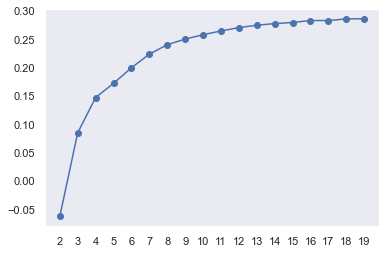

In [79]:
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

In [81]:
model = KNeighborsRegressor(n_neighbors=9, n_jobs=-1)
model.fit(X_train, y_train)

preds = model.predict(X_test)

In [82]:
differs = y_test - preds

print(f'r2_score: {r2_score(y_test,preds)}')

r2_score: 0.24936104833806372


In [86]:
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 13.149554042097357
RMSE value for k=  2 is: 10.732800182315538
RMSE value for k=  3 is: 9.961132116450546
RMSE value for k=  4 is: 9.616672440824523
RMSE value for k=  5 is: 9.474619001602973
RMSE value for k=  6 is: 9.31656022591359
RMSE value for k=  7 is: 9.17547547697828
RMSE value for k=  8 is: 9.076530164860408
RMSE value for k=  9 is: 9.017233318377865
RMSE value for k=  10 is: 8.971000371792023
RMSE value for k=  11 is: 8.930342776652388
RMSE value for k=  12 is: 8.894572514752777
RMSE value for k=  13 is: 8.869173777948465
RMSE value for k=  14 is: 8.851496194074358
RMSE value for k=  15 is: 8.839743853711354
RMSE value for k=  16 is: 8.818149074950705
RMSE value for k=  17 is: 8.818402769578853
RMSE value for k=  18 is: 8.800790190025625
RMSE value for k=  19 is: 8.798939519773763
RMSE value for k=  20 is: 8.797665236078995


<AxesSubplot:>

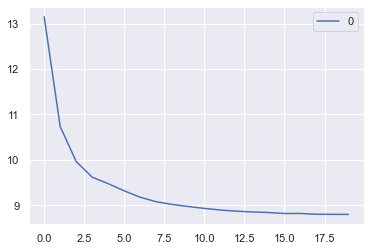

In [87]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [88]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

So its worse.

#### K-Fold

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot

In [90]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='auto')))

In [91]:
seed = 42
num_folds = 5
scoring = 'neg_mean_squared_error'

In [92]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -103.451950 (2.586183)
LASSO: -105.273663 (2.616029)
EN: -105.172477 (2.608402)
KNN: -86.928807 (3.159326)
CART: -73.640401 (0.823191)
SVR: -80.232913 (1.006480)


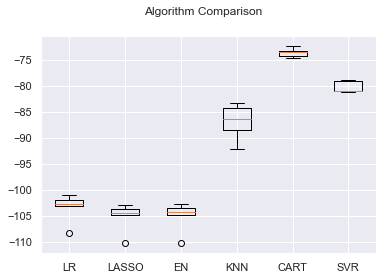

In [93]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

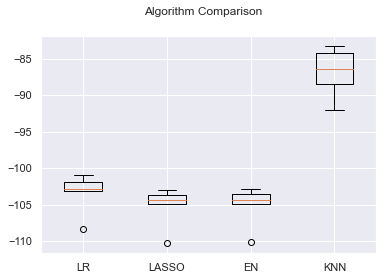

In [94]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results[0:-2])
ax.set_xticklabels(names[0:-2])
pyplot.show()

#### Bagging

In [95]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))

In [96]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -82.729180 (1.026455)
ScaledGBM: -74.258781 (0.919291)
ScaledRF: -73.684367 (0.824967)
ScaledET: -73.622723 (0.843172)


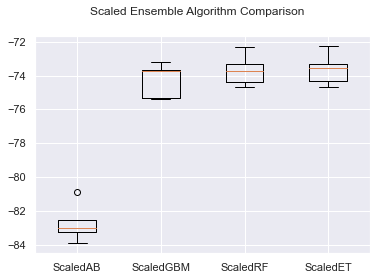

In [97]:
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Scaling

In [98]:
models = []
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(gamma='auto'))])))

In [99]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -103.451950 (2.586183)
ScaledLASSO: -105.228283 (2.677377)
ScaledEN: -104.732581 (2.673664)
ScaledKNN: -86.462147 (2.223876)
ScaledCART: -73.643044 (0.825493)
ScaledSVR: -93.173642 (1.605402)


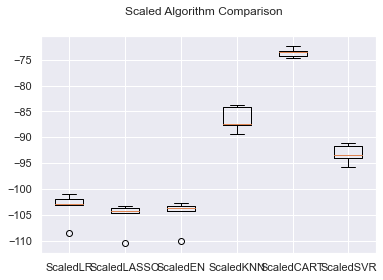

In [100]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Let's see how this helped:

Better:
- KNN
- CART
- SVR

Worse:
- LASSO
- EN

Same:
- LR


###  Complete a K-fold cross-validation analysis for your improved model
   - Discuss the difference in the performance of the 4 algorithms against your improved dataset.

The K-fold cross validation analysis shows that KNN Decision Tree Regression analysis and SVR are the greatest machine learning algorithms and were improved with scaling. It seems as though the CART method had the lowest error of means which tells me it would provide the most accurate results. I will work on that in the further machine learning courses.